IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Tarea 01 – Cargando y Analizando Datos

- **Fecha de Entrega:** martes 26 de agosto de 2025, a las 23:59.
- 
**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en l emódulo de Tara 01 habilitado en Canvas.




## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tara.

- Deben hacer sus consultas y comentarios sobre la Tarea a traves del canal de Tareas en eo del curso en Canvas.os.
cteriza.

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

Para los ejercicios a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Para esta tarea, tendremos como objetivo comprender cómo han cambiado los juegos de mesa en los últimos 40 años. Específicamente queremos saber qué tipos de juegos se han vuelto más comunes hoy en día y qué los caracteriza.

### 1.3 Recomendaciones
- Utiliza las librerías sugeridas en el notebook o justifica brevemente si incorporas otras.
- Revisa que todas las celdas se ejecuten en orden, desde el inicio, sin errores.
- Comenta tu código para explicar qué hace cada sección relevante.
- Asegúrate de que las visualizaciones sean fáciles de interpretar y tengan títulos y etiquetas adecuados.

## 2. Datos

Estaremos utilizando información extraída desde [BoardGameGeek.com](https://boardgamegeek.com/), una plataforma para aficionados de los juegos de mesa, que permite a sus usuarios registrar, calificar e intercambiar sus juegos favoritos. Actualmente, BGG es una de las bases de datos más extensa y diversa de juegos de mesa.

El dataset con el que trabajaremos consiste en un grupo de archivos CSV que contienen información sobre más de 100.000 juegos de mesa almacenados en la plataforma. Este puede descargarse directamente desde el siguiente enlace: https://www.kaggle.com/datasets/mshepherd/board-games Para descargar los datos, haga click en el botón de **Download**, donde podrá descargar los archivos como `.zip`, o bien utilizar la API de Kaggle.

Para el desarrollo de esta tarea, solo utilizaremos los archivos con el prefijo `bgg_`.

**Si utiliza la API de Kaggle para descargar los datos, deje el código utilizado en la siguiente celda:**

In [185]:
# Descarga de datos desde Kaggle

### 2.1 Librerías

Para esta tarea recomendamos al menos usar las librerías indicadas en la siguiente celda del Notebook. Puede agregar otras si lo estima conveniente para responder de mejor forma las preguntas de la Tarea.

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 3. Desarrollo

Para cada una de las siguientes preguntas o actividades incluya una o más celdas de código y Markdown con las respuestas o comentarios necesarios para contestar la pregunta o lograr la actividad. Agregue sus celdas a continuación de cada pregunta para que el Notebook quede ordenado.

En el caso de gráficos, figuras o tablas, asegúrese que todas tengan título, etiquetas en los ejes o haya claridad de los contenidos.

### 3.1 DataFrame unificado (1 punto)

Vamos a cargar en un DataFrame los datos de juegos guardados en el documento `bgg_GameItem.csv`. Al inspeccionar nuestros datos, podemos notar que los valores de ciertas comunas vienen "codificados" con ID. Para comenzar, vamos a juntar la información de los distintos archivos descargados.

**a) (0.8 pts)** Genere un DataFrame único con toda la información de cada juego, incluyendo: nombres de artistas y diseñadores involucrados, mecánicas, categorías, tipo, familia y editorial. Guarde este DataFrame en un nuevo archivo CSV.

In [187]:
#Extraemos todos lo archivos de la carpeta data

category = pd.read_csv("Data/bgg_Category.csv")
game_family = pd.read_csv("Data/bgg_GameFamily.csv")
game_Item = pd.read_csv("Data/bgg_GameItem.csv")
game_Type = pd.read_csv("Data/bgg_GameType.csv")
mechanic = pd.read_csv("Data/bgg_Mechanic.csv")
person = pd.read_csv("Data/bgg_Person.csv")
publisher = pd.read_csv("Data/bgg_Publisher.csv")

In [188]:
#Se convierten a diccionarios para ingresar a las columnas que tengan más ids

diccionario_categoria = dict(zip(category['bgg_id'], category['name']))
diccionario_familia = dict(zip(game_family['bgg_id'], game_family['name']))
diccionario_tipo = dict(zip(game_Type['bgg_id'], game_Type['name']))
diccionario_mecanicas = dict(zip(mechanic['bgg_id'], mechanic['name']))
diccionario_personas = dict(zip(person['bgg_id'], person['name']))
diccionario_editorial = dict(zip(publisher['bgg_id'], publisher['name']))

In [189]:
# esta función convierte los ids multiples a los nombres

def convertidor_id(id_string, mapping_dict):
    if pd.isna(id_string):
        return []

    resultado = []
    ids = str(id_string).split(',')
    for i in ids:
        id_int = int(i)
        if id_int in mapping_dict:
            resultado.append(mapping_dict[id_int])
        else:
            resultado.append(f"Unknown-{i}")
    return resultado


In [190]:
Game_Item = game_Item.copy() # copiamos el dataframe para no modificar el original
Game_Item['category_names'] = Game_Item['category'].apply(lambda x: convertidor_id(x, diccionario_categoria)) 
Game_Item['mechanic_names'] = Game_Item['mechanic'].apply(lambda x: convertidor_id(x, diccionario_mecanicas))

In [191]:
# esta función convierte un solo id a el nombre correcto

def convertidor_de_nombre(id_value, mapping_dict):
    if pd.isna(id_value) or id_value == '':
        return 'Unknown'

    try:
        id_int = int(id_value)
        if id_int in mapping_dict:
            return mapping_dict[id_int]
        else:
            return f"Unknown-{id_value}"
    except ValueError:
        return f"Unknown-{id_value}"


In [192]:
# aca se utilizan las funciones de conversión

Game_Item['category'] = Game_Item['category'].apply(lambda x: convertidor_id(x, diccionario_categoria))
Game_Item['mechanic'] = Game_Item['mechanic'].apply(lambda x: convertidor_id(x, diccionario_mecanicas))
Game_Item['game_type'] = Game_Item['game_type'].apply(lambda x: convertidor_de_nombre(x, diccionario_tipo))
Game_Item['family'] = Game_Item['family'].apply(lambda x: convertidor_id(x, diccionario_familia))
Game_Item['designer'] = Game_Item['designer'].apply(lambda x: convertidor_id(x, diccionario_personas))
Game_Item['artist'] = Game_Item['artist'].apply(lambda x: convertidor_id(x, diccionario_personas))
Game_Item['publisher'] = Game_Item['publisher'].apply(lambda x: convertidor_id(x, diccionario_editorial))

In [193]:
list_columns = ['category', 'mechanic', 'designer', 'artist', 'publisher', 'family', 'category_names', 'mechanic_names']

for col in list_columns:
    Game_Item[col] = Game_Item[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [194]:
#acá se guarda el archivo .csv en data

Game_Item.to_csv("Data/Dataframe_unidicado.csv", index=False)
nuevo_df = pd.read_csv("Data/Dataframe_unidicado.csv")
nuevo_df.head()

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,...,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id,category_names,mechanic_names
0,1,Die Macher,1986.0,Strategy Game,Karl-Heinz Schmiel,"Marcus Gschwendtner, Harald Lieske","Hans im Glück, Moskito Spiele, Ediciones MasQu...",3.0,5.0,4.0,...,4.3144,1.166667,NaN,NaN,NaN,NaN,NaN,NaN,"Economic, Negotiation, Political","Alliances, Area Majority / Influence, Auction/..."
1,2,Dragonmaster,1981.0,Strategy Game,"G. W. ""Jerry"" D'Arcey",Bob Pepper,"E.S. Lowe, Milton Bradley",3.0,4.0,3.0,...,1.9636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Card Game, Fantasy",Trick-taking
2,3,Samurai,1998.0,Strategy Game,Reiner Knizia,Franz Vohwinkel,"Fantasy Flight Games, Hans im Glück, 999 Games...",2.0,4.0,2.0,...,2.4784,1.006579,NaN,NaN,NaN,NaN,NaN,NaN,"Abstract Strategy, Medieval","Area Majority / Influence, Hand Management, He..."
3,4,Tal der Könige,1992.0,Strategy Game,Christian Beierer,Thomas di Paolo,KOSMOS,2.0,4.0,2.0,...,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ancient,"Action Points, Area Majority / Influence, Auct..."
4,5,Acquire,1964.0,Strategy Game,Sid Sackson,"Scott Okumura, Peter Whitley","3M, The Avalon Hill Game Co, Avalon Hill, Duja...",2.0,6.0,3.0,...,2.4985,1.095890,NaN,NaN,NaN,NaN,NaN,NaN,"Economic, Territory Building","Hand Management, Investment, Market, Square Gr..."


**b) (0.2 pts)** ¿Cuánto espacio en disco ocupa este DataFrame? ¿Cuánto espacio en disco ocupan los documentos CSV separados? ¿A qué se debe esta diferencia? Comente.



- El dataframe final tiene un tamaño de 38.422 KB, que es mayor notoriamente a todos los archivos sumados, que en total suman 17.593 KB. A mi parecer esto se debe a que todo esta dentro de un mismo archivo, haciendolo más pesado.

### 3.2 Juegos publicados anualmente (1.5 puntos)


**a) (0.5 pts)** Limpie los datos para dejar solo aquellos que tienen valores válidos de año de publicación. Luego responda: ¿cuál es el rango de años con el que estamos trabajando? ¿Tienen sentido estos años?


In [195]:
nuevo_df = nuevo_df.dropna(subset="year") #Con el .dropna lo que hacemos es eliminar las filas que tienen Nan en "year"
print(nuevo_df["year"].min()) #Minimo
print(nuevo_df["year"].max()) #Maximo

-3500.0
2026.0


* El rango que tienen estos datos son del años -3500 hasta el 2026. Estos no tienen sentido ya que según internet los juegos de mesas datan desde el año 1960 hasta la actualidad, sin contar el 2026 ya que estamos en 2025.

**b) (0.5 pts)** Seleccione solamente los juegos entre los años 1980 y 2025. Luego grafique la cantidad de juegos publicados por año. ¿Cómo es esta tendencia? Comente.

In [196]:
df_filtrado = nuevo_df[(nuevo_df["year"] >= 1980 ) & (nuevo_df["year"] <= 2025)]

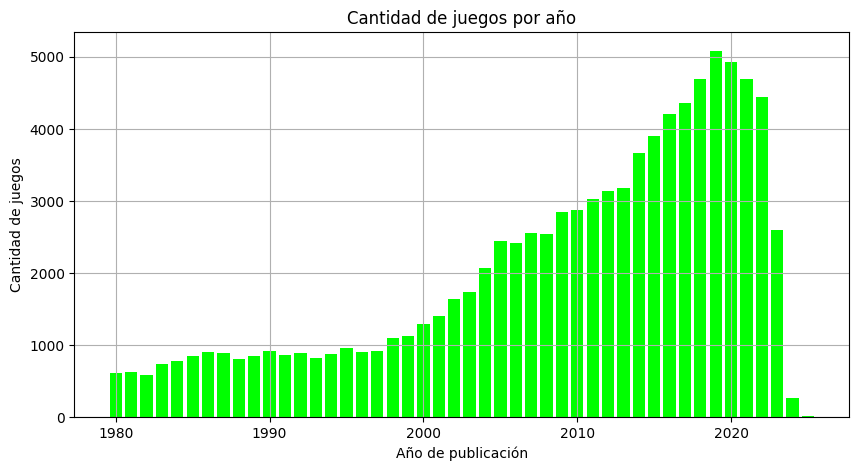

In [197]:
juegos_por_año = df_filtrado["year"].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(juegos_por_año.index, juegos_por_año.values, color="lime")

plt.title("Cantidad de juegos por año")
plt.xlabel("Año de publicación")
plt.ylabel("Cantidad de juegos")
plt.grid(True)
plt.show()

* La tendencia que tienen los juegos de mesas es ascendente mientras más pasan los años, más juegos se crean. Pero luego del 2020 notamos una gran caida en la creación de juego de mesa.

**c) (0.5 pts)** ¿Entre qué años hubo un mayor aumento de publicación de juegos de mesa según los registros de BGG?

In [198]:
crecimiento = juegos_por_año.diff()

max_año = crecimiento.idxmax()
max_crecimiento = crecimiento.max()

print(max_año, max_crecimiento)

2014.0 484.0


* Con la función .diff() podemos encontrar las diferencias entre cada año y con idmax() encontramos el año, el cual es el 2014, con un aumento de 484 juegos desde el 2013.

### 3.3 Análisis de duración y complejidad (1.5 puntos)

Si bien hay muchas posibles características que podemos explorar para los juegos de mesa, esta vez nos centraremos en el tiempo de juego y la complejidad. En esta sección queremos comprender si se ha modificado notablemente la duración promedio y la percepción de complejidad de los juegos de mesa a través de los años.

**a) (0.3 pts)** Inspecciones y filtre los datos que tengan valores válidos para: tiempo mínimo de juego, tiempo máximo de juego y complejidad. En el caso de que existan "outliers", puede descartarlos, cosiderando un rango razonable para las variables anteriores. Justifique su desición.

In [199]:
dataframe_limpio = df_filtrado.dropna(subset=["min_time","max_time","complexity"])
dataframe_limpio = dataframe_limpio[(dataframe_limpio["min_time"] > 0) & (dataframe_limpio["min_time"] <= 300)]
dataframe_limpio = dataframe_limpio[(dataframe_limpio["max_time"] > 0) & (dataframe_limpio["max_time"] <= 420)]
dataframe_limpio = dataframe_limpio[dataframe_limpio["complexity"].between(1,5)]

* Coloque un rango de un tiempo minimo de 0 min a 5 horas, ya que lo encontre adecuado pensando de que un juego de los más famosos como el monopoly puede durar alrededor de 4 - 6 horas. Para el rango de maximo tiempo puse como tope 7 horas ya que la mayor de cantidad de juegos se encuentran entre estas cantidades de minutos, abarcando a la gran mayoria de los datos.

**b) (0.2 pts)** Veremos ahora si ha cambiado la duración promedio de los juegos de mesa en nuestro rango de años seleccionado. Primero, cree una nueva columna `avg_time` en el dataset con la duración promedio supuesta para cada juego.

In [200]:
dataframe_limpio["avg_time"] = (dataframe_limpio["min_time"] + dataframe_limpio["max_time"])/2

**c) (0.5 pts)** Grafique la duración promedio de juegos al año entre 1980 y 2025. ¿Existe alguna tendencia? Asegúrese de colocar las unidades correspondientes en sus ejes si es necesario. Comente sus resultados.

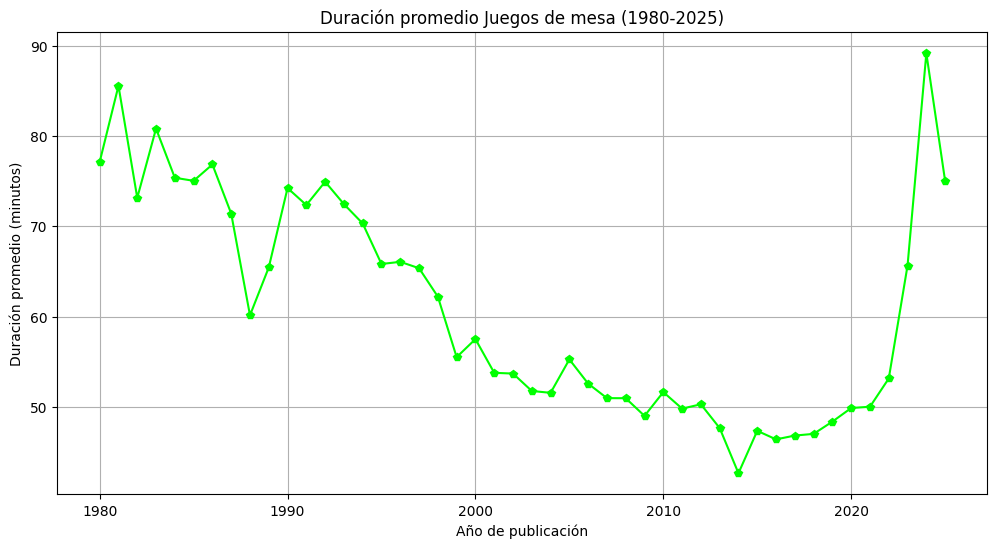

In [201]:
dataframe_limpio["year"] = pd.to_numeric(dataframe_limpio["year"], errors="coerce")
avg_time_por_año = dataframe_limpio.groupby("year")["avg_time"].mean()

plt.figure(figsize=(12,6))
plt.plot(avg_time_por_año.index, avg_time_por_año.values, marker="p", color="lime")
plt.title("Duración promedio Juegos de mesa (1980-2025)")
plt.xlabel("Año de publicación")
plt.ylabel("Duración promedio (minutos)")
plt.grid(True)
plt.show()

* Existe una tendencia descendente, diciendonos que mientras más pasaban los años en promedio duraban menos sus partidas, los juegos de mesas publicados despues del año 1990 en promedio duran menos de 1 hora, lo cual podemos preguntarnos: ¿La gente tiene menos tiempo para jugar?

**d) (0.5 pts)** Nos interesa saber si los juegos de mesa recientes son más complejos que aquellos publicados antes de los 2000. BoardGameGeek permite evaluar la complejidad (o "weight") de un juego en una escala de 1 a 5, siendo 1 un juego "liviano" o fácil de entender, y 5 un juego "pesado" o complejo. Primero, seleccione los juegos que han sido evaluados por al menos 100 usuarios. Luego grafique la complejidad promedio de los juegos según año. Responda: ¿ha cambiado la percepción de complejidad entre juegos entre 1980 y la actualidad?

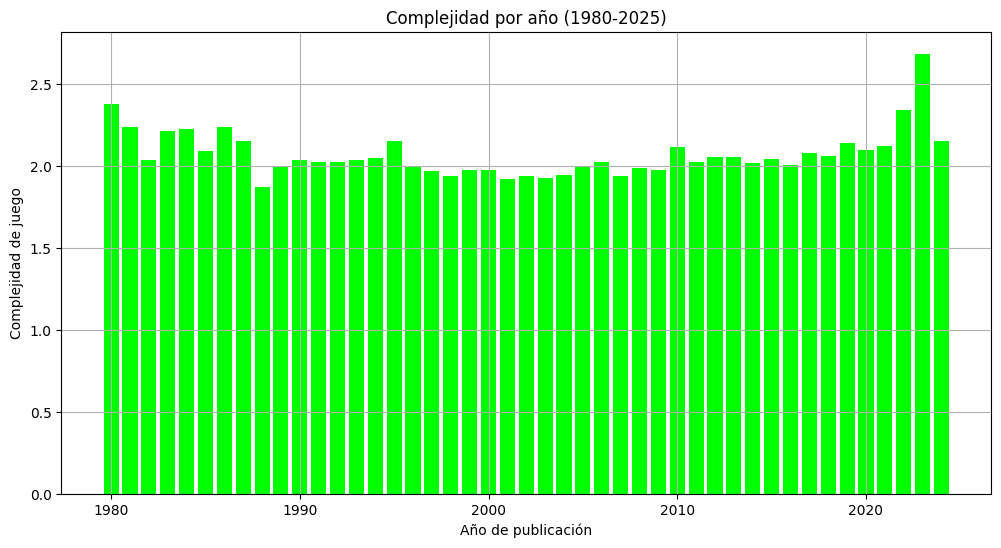

In [202]:
dataframe_limpio = dataframe_limpio[(dataframe_limpio["num_votes"] >= 100)]

complejidad_por_año = dataframe_limpio.groupby("year")["complexity"].mean()

plt.figure(figsize=(12, 6))
plt.bar(complejidad_por_año.index, complejidad_por_año.values, color="lime")
plt.title("Complejidad por año (1980-2025)")
plt.xlabel("Año de publicación")
plt.ylabel("Complejidad de juego")
plt.grid(True)
plt.show()

* No ha cambiado tanto la percepción de complejidad a pesar de que entre los años de 1980 la duración en promedio es mayor que a los del 2000.

### 3.4 Análisis de categorías comunes (2 puntos)

Existe una gran diversidad de categorías de juegos de mesa. Ahora nos concentraremos en un grupo específico de ellas, con el fin de analizar cómo a cambiado la cantidad de juegos de estas clases desde 1980 hasta hoy.

**a) (0.7 pts)** ¿Cuáles son las 5 categorías más comunes en los juegos del dataset? Muestre la cantidad de juegos que hay de cada una. Puede graficar estos valores, o bien, entregar un DataFrame con sus valores.

La categoria: CARD GAME, tiene una cantidad de: 4010
La categoria: FANTASY, tiene una cantidad de: 1906
La categoria: WARGAME, tiene una cantidad de: 1408
La categoria: DICE, tiene una cantidad de: 1179
La categoria: FIGHTING, tiene una cantidad de: 1148


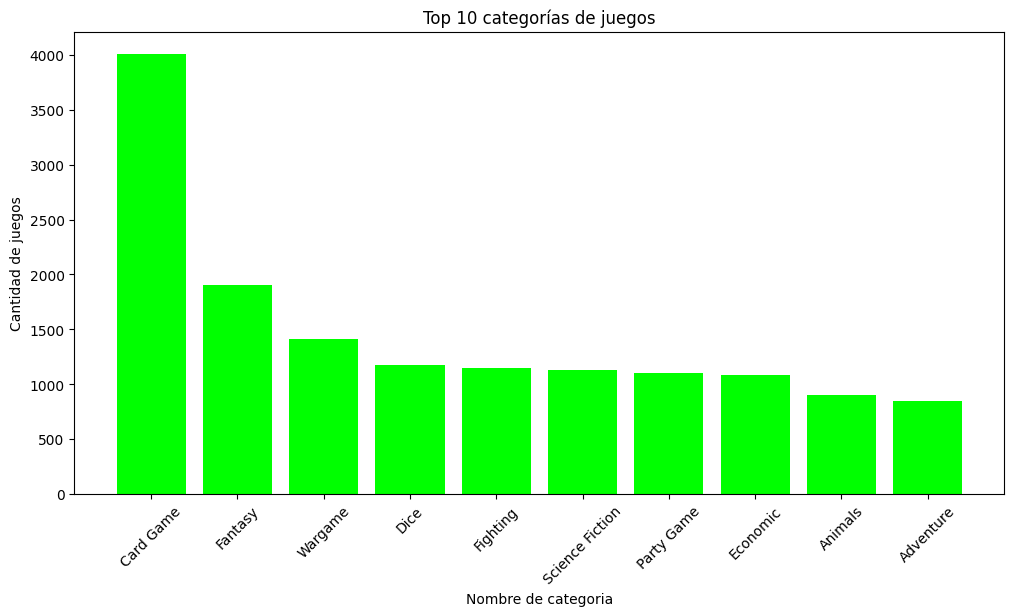

In [203]:
categorias = dataframe_limpio["category"].dropna().str.split(", ")

categorias = categorias.explode()

juegos_por_tipo = categorias.value_counts().head(10) #Coloque el top 10 para ver más datos
top_5_por_tipo = categorias.value_counts().head(5)

for categoria, cantidad in top_5_por_tipo.items():
    print(f"La categoria: {categoria.upper()}, tiene una cantidad de: {cantidad}")

plt.figure(figsize=(12, 6))
plt.bar(juegos_por_tipo.index, juegos_por_tipo.values, color="lime")
plt.xticks(rotation=45)
plt.title("Top 10 categorías de juegos")
plt.xlabel("Nombre de categoria")
plt.ylabel("Cantidad de juegos")
plt.show()



* Las 5 categorias más comunes son Card Game, Fantasy, Wargame, Dice, Fighting.

**b) (0.3 pts)** Para cada una de estas 5 categorías, cree un DataFrame que contenga la cantidad de juegos en el dataset según año. Luego junte estos DataFrames en uno solo con los atributos de "Año", "Categoría" y "Cantidad".

In [204]:
dfs = []

for categoria in top_5_por_tipo.index:
    filtro = dataframe_limpio[dataframe_limpio["category"].str.contains(categoria, na=False)]
    df_categoria = filtro.groupby("year")["name"].count().reset_index()
    df_categoria.columns = ["Año", "Cantidad"]
    df_categoria["Categoría"] = categoria
    
    dfs.append(df_categoria)

df_final = pd.concat(dfs, ignore_index=True)
df_final.head()

,Año,Cantidad,Categoría
0,1980.0,5,Card Game
1,1981.0,6,Card Game
2,1982.0,7,Card Game
3,1983.0,4,Card Game
4,1984.0,1,Card Game


**c) (1 pto)** Grafique, en un solo gráfico y con distintos colores, la cantidad de juegos por año según categoría. Preocúpese de ponerle etiquetas al gráfico para identificar cada categoría y una leyenda donde se muestre cada una. Comente: ¿ha habido un cambio entre los juegos más comunes en los años 80 y hoy?


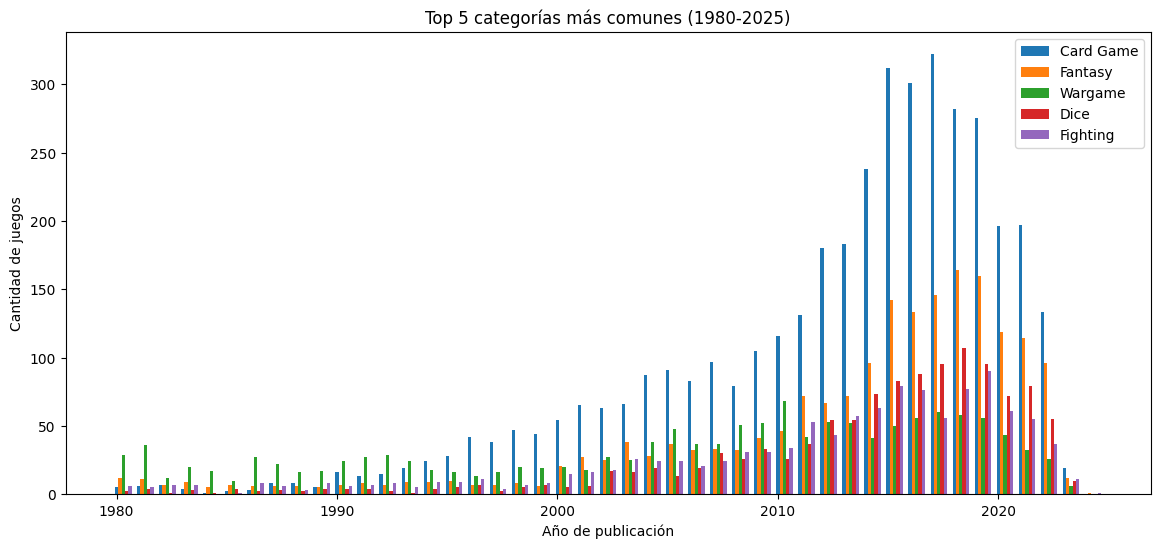

In [205]:
import numpy as np

categorias = df_final["Categoría"].unique()
anios = sorted(df_final["Año"].unique())
width = 0.15  # ancho de las barras

plt.figure(figsize=(14,6))

for i, categoria in enumerate(categorias):
    df_cat = df_final[df_final["Categoría"] == categoria]
    plt.bar(np.array(df_cat["Año"])+i*width, df_cat["Cantidad"], width=width, label=categoria)

plt.xlabel("Año de publicación")
plt.ylabel("Cantidad de juegos")
plt.title("Top 5 categorías más comunes (1980-2025)")
plt.legend()
plt.show()


### 3.5 Análisis Crítico (Bono +0.5 puntos)

¿Qué limitaciones o problemas encontraste en los datos?

* Durante la realización de la tarea encontre varias limitaciones, al no saber tanto sobre como manejar datos tuve que acudir a paginas de internet, videos, IA (para entender bien el enunciado). Además los datos mismos estaban estructurtados de tal forma que se me hizo más complicado, como por ejemplo el hecho de que estuvieran codificados en una especie de lista. Al igual los datos estaban tan dispersos que se me hacia dificil visualizarlos, pero gracias a esto aprendi muchas funciones de pandas y matplotlib.